# NASA Earthdata Cloud Access and Analysis of Airborne AVIRIS Data 

**Summary**

This tutorial will demonstrate Earthdata discovery and direct access of NASA airborne AVIRIS data. We'll programmatically access and visualize Level 3 AVIRIS-Next Generation (ANG) Reflectance dataset collected during the Biodiversity Survey of the Cape (BioSCape) Campaign.  BioSCape is an integrated field and airborne campaign in South Africa's Greater Cape Floristic Region (GCFR) where collections occurred in 2023.  The BioSCape Campaign utilzed four NASA airborne instruments to collect UV/visible to short wavelength infrared (UVSWIR) and thermal imaging (TIR) spectroscopy and laser altimetry LiDAR data over terrestrial and aquatic targets.   Airborne Visible InfraRed Imaging Spectrometer - Next Generation (AVIRIS-NG), Portable Remote Imaging SpectroMeter (PRISM), Land, Vegetation, and Ice Sensor (LVIS), and Hyperspectral Thermal Emission Spectrometer (HyTES).

- Learn more about [**BioSCape**](https://www.bioscape.io/)
- Nasa Earthdata Search: [**Discover Earthdata BioSCape Data**](https://search.earthdata.nasa.gov/search?fpj=BioSCape)

The BioSCape Campaign has produced an **AVIRIS-NG L3 Resampled Mosaic** dataset.  

> Brodrick, P.G., A.M. Chlus, R. Eckert, J.W. Chapman, M. Eastwood, S. Geier, M. Helmlinger, S.R. Lundeen, W. Olson-Duvall, R. Pavlick, L.M. Rios, D.R. Thompson, and R.O. Green. 2025. BioSCape: AVIRIS-NG L3 Resampled Reflectance Mosaics, V2. ORNL DAAC, Oak Ridge, Tennessee, USA. [https://doi.org/10.3334/ORNLDAAC/2427](https://doi.org/10.3334/ORNLDAAC/2427)
>
<div class="alert alert-block alert-info">
AVIRIS-NG L3 Resampled Mosaics: Surface reflectance data (Level 2b) derived from the AVIRIS-NG instrument were resampled to 5-m spatial resolution and mosaiced into a regular tile system of 807 tiles. A given tile includes multiple AVIRIS-NG scenes from multiple flight lines spanning multiple days.  The mosaics in this dataset were generated by stitching together separate scenes and resampling to 5-m resolution in the Hartebeesthoek94 projected coordinate system (WGS-84 datum, EPSG 9221). The mosaic files are distributed on a tiled grid system, and the tile name is included in the file name. Mosaics were generated by manually grouping sets of flight lines into different chunks that should be placed 'in front of' or 'behind' other chunks. The selection criteria included a combination of the weather during observations, flight conditions, flightbox design, and the time the flight was taken.</div>

Dataset [**Data Processing Levels**](https://www.earthdata.nasa.gov/learn/earth-observation-data-basics/data-processing-levels) 
- **Level 3**:  Variables mapped on uniform space-time grid scales, usually with some completeness and consistency.

[**NASA JPL BioSCape Data Portal**](https://popo.jpl.nasa.gov/mmgis-aviris/?mission=BIOSCAPE)

![BioSCapeMMGIS_full](images/bioscapeMMGIS.png)
![BioSCape_MMGIS](images/BioSCape_MMGIS_rs70.png)



### Requirements

In [1]:
import earthaccess
import geopandas as gpd
import pyproj
from pyproj import Proj
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from shapely.ops import transform
from shapely.ops import orient
from shapely.geometry import Polygon, MultiPolygon
import folium
import hvplot.xarray
import holoviews as hv
hvplot.extension('bokeh')
import rioxarray as rx
from rioxarray import merge
import rasterio

![earthaccess](images/earthaccess.png)

[**`earthaccess`**](https://www.earthdata.nasa.gov/news/blog/earthaccess-earth-science-data-simplifiedl) is a Python library that simplifies data discovery and access to NASA Earthdata data by providing an abstraction layer to NASA's APIs for programmatic access.  

earthaccess will be used to:
- **`Authentication:`** - handles a user's identity (authentication) with NASA's Earthdata Login (EDL), 
- **`Search:`** search the NASA Earthdata Data holdings using NASA's Common Metadata Repository (CMR), and 
- **`Access:`** provide direct cloud file download and access 

**Earthdata Login**

NASA [**`Earthdata Login`**](https://urs.earthdata.nasa.gov/)  is a user registration and profile management system for users getting Earth science data from NASA Earthdata.  If you download or access NASA Earthdata data, you need an Earthdata Login.

Using `earthaccess` we'll login and authentice to NASA Earthdata Login.
- For this exercise, we will be prompted for and interactively enter our Eathdata Login credentials (login, password)

## Authentication

Using `earthaccess` we'll login and **authenticate** to NASA Systems.
- For this exercise, we will be prompted for and interactively enter our Eathdata Login credentials (login, password)

In [2]:
auth = earthaccess.login()

## Searching by **Instrument**

In [3]:
results = earthaccess.search_datasets(instrument="AVIRIS-NG")
print(f"Total Datasets (results) found: {len(results)}")

Total Datasets (results) found: 30


List the short-name for each dataset

In [4]:
for item in results:
    summary = item.summary()
    print(summary["short-name"])

BioSCape_ANG_V02_L3_RFL_Mosaic_2427
ABoVE_Airborne_AVIRIS_NG_V3_2362
AVIRIS-NG_CH4_CO2_Plumes_2406
AVIRIS-NG_Data_Idaho_1533
AVIRIS-NG_L1B_radiance_2095
AVIRIS-NG_L2_Reflectance_2110
AVIRIS_FlightLine_Locator_2140
BioSCape_AVNG_L2B_BRDF_GCFR_2385
CH4_Plume_AVIRIS-NG_1727
COMEX_AVIRIS_NG_Flights_2342
DeltaX_AVIRIS-NG_UAVSAR_L3_AGB_2410
DeltaX_L1_AVIRIS_Radiance_1987
DeltaX_L2A_AVIRIS-NG_BRDF_V3_2355
DeltaX_L2B_AVIRIS-NG_FracCover_2407
DeltaX_L2_AVIRIS_Reflectance_1988
DeltaX_L3_AVIRIS-NG_AGB_V3_2409
DeltaX_L3_AVIRIS-NG_Veg_Types_2352
DeltaX_L3_AVIRIS-NG_Water_V3_2152
PreDeltaX_L2_AVIRIS_SR_1826
PreDeltaX_L3_AVIRIS_Biomass_1821
PreDeltaX_L3_AVIRIS_Sediment_1822
SHIFT_AVIRISNG_L2A_refl_2376
SHIFT_AVNG_Canopy_WaterContent_2242
SHIFT_AVNG_FullRes_QkLook_2189
SHIFT_AVNG_L1A_RDN_unrec_2184
SHIFT_Wetland_Salinity_2436
SNEX21_SSR
SNEX23_Apr23_AVIRISNG
Wetland_VegClassification_PAD_2069
goesrpltavirisng


### Search by **Project** 

In [5]:
results = earthaccess.search_datasets(project="BioSCape")
print(f"Total Datasets (results_projects) found: {len(results)}")

Total Datasets (results_projects) found: 11



- We see many useful fields for any one dataset including: `short-name`, `concept-id`, the `S3BucketAndObjectPrefixNames`

In [6]:
for index, item in enumerate(results):
    if index == 0:
        summary = item.summary()
        print(summary)

{'short-name': 'BioSCape_ANG_V02_L3_RFL_Mosaic_2427', 'concept-id': 'C3523930138-ORNL_CLOUD', 'version': '2', 'file-type': "[{'Format': 'multiple', 'TotalCollectionFileSize': 3.462, 'TotalCollectionFileSizeUnit': 'TB'}]", 'get-data': ['https://search.earthdata.nasa.gov/search?q=BioSCape_ANG_V02_L3_RFL_Mosaic_2427&ac=true'], 'cloud-info': {'Region': 'us-west-2', 'S3BucketAndObjectPrefixNames': ['s3://ornl-cumulus-prod-protected/bioscape/BioSCape_ANG_V02_L3_RFL_Mosaic/data', 's3://ornl-cumulus-prod-public/bioscape/BioSCape_ANG_V02_L3_RFL_Mosaic'], 'S3CredentialsAPIEndpoint': 'https://data.ornldaac.earthdata.nasa.gov/s3credentials', 'S3CredentialsAPIDocumentationURL': 'https://data.ornldaac.earthdata.nasa.gov/s3credentialsREADME'}}


Let's look at `short-name` for all of the search **results**

In [7]:
for item in results:
    summary = item.summary()
    print(summary["short-name"])

BioSCape_ANG_V02_L3_RFL_Mosaic_2427
Acoustic_Data_Cape_Floristic_2372
BIOSCAPE_COASTAL_CARBON
BioSCape_AVNG_L2B_BRDF_GCFR_2385
BioSCape_VegPlots_Berg_Eerste_2425
LVISF1B
LVISF1B
LVISF2
LVISF2
OLVIS1A
OLVIS1A


- **`BioSCape_ANG_V02_L3_RFL_Mosaic_2427`** is the `short-name` of the dataset of interest for this tutorial. 

Let's use **`earthaccess`** `search_data` to query the [**BioSCape: AVIRIS-NG L3 Resampled Reflectance Mosaics, V2**](https://search.earthdata.nasa.gov/search/granules?p=C3523930138-ORNL_CLOUD) data to discover the files within that dataset.

In [8]:
results = earthaccess.search_data(
    short_name = 'BioSCape_ANG_V02_L3_RFL_Mosaic_2427', 
)
print(f"Total granules found: {len(results)}")

Total granules found: 871


Let's look at the first result and examine the details of the granule-level CMR metadata information

In [9]:
# granule-level CMR metadata information
results[:1]

[Collection: {'ShortName': 'BioSCape_ANG_V02_L3_RFL_Mosaic_2427', 'Version': '2'}
 Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'BoundingRectangles': [{'WestBoundingCoordinate': 17.6241, 'EastBoundingCoordinate': 26.3228, 'NorthBoundingCoordinate': -31.1563, 'SouthBoundingCoordinate': -35.0058}]}}}
 Temporal coverage: {'RangeDateTime': {'BeginningDateTime': '2023-10-22T00:00:00Z', 'EndingDateTime': '2023-11-26T23:59:59Z'}}
 Size(MB): 0.4013175964355469
 Data: ['https://data.ornldaac.earthdata.nasa.gov/protected/bioscape/BioSCape_ANG_V02_L3_RFL_Mosaic/data/BioSCape_ANG_V02_L3_RFL_Mosaic_tiles.geojson']]

## Setting Search Parameters

- `bounding_box`
- `temporal` range
-  `granule_name` refined 

Let's first create and visualize a **`bounding box`** for an area-of-interest within the South Africa Greater Cape Floristic Region (GCFR) of the BioSCape Campaign 

In [10]:
import geopandas as gpd
from shapely.geometry import Polygon
from shapely.ops import transform
import pyproj

def create_geo_bb(coordinates, crs_in='epsg:4326', crs_out='epsg:4326'):
    
    polygon_shape = Polygon(coordinates)

    if crs_in != crs_out:
      project_in = pyproj.Proj(init=crs_in)
      project_out = pyproj.Proj(init=crs_out)
    
      polygon_shape = transform(pyproj.Transformer.from_proj(project_in, project_out, always_xy=True).transform, polygon_shape)
    
    polygon = gpd.GeoDataFrame(geometry=[polygon_shape], crs=crs_out)
    return polygon

coordinates = [
    (17.9907, -33.1243),
    (18.2469, -33.1243),
    (18.2469, -33.2817),
    (17.9907, -33.2817),
    (17.9907, -33.1243)
]

polygon_gdf = create_geo_bb(coordinates)
print(polygon_gdf)

                                            geometry
0  POLYGON ((17.9907 -33.1243, 18.2469 -33.1243, ...


In [11]:
#polygon_gdf.crs

In [12]:
polygon_gdf.explore(fill=False, tiles='https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}', attr='Google')

**We'll use this bounding box and temporal parameters to refine our search of BioSCape AVIRIS-NG L3 files in our region and time of interest**

Again, using **`earthaccess`** we can query the [**`BioSCape: AVIRIS-NG L3 Resampled Reflectance Mosaics, V2`**](https://search.earthdata.nasa.gov/search/granules?p=C3523930138-ORNL_CLOUD) data to discover files within the spatial and temporal subset of interest.

- recall we discovered in our Earthdata Search investigation that datasets have NASA Earthdata Unique Identifiers (e.g. DOI, ConceptID, short_name)

- dataset of interest short_name:  **`BioSCape_ANG_V02_L3_RFL_Mosaic_2427`**

- The BioSCape Airborne Campaign took place from 2023-10-22 to 2023-11-26

In [13]:
# bounding lon, lat as a list of tuples
bounds = polygon_gdf.geometry.apply(orient, args=(1,))
# simplifying the polygon to bypass the coordinates 
# limit of the CMR with a tolerance of .01 degrees
xy = bounds.simplify(0.01).get_coordinates()

date_range = ("2023-10-22", "2023-11-26")  

results = earthaccess.search_data(
    short_name = 'BioSCape_ANG_V02_L3_RFL_Mosaic_2427', 
    polygon=list(zip(xy.x, xy.y)),
    temporal = date_range,
    granule_name=('*AVIRIS-NG_BIOSCAPE_V02_L3*')
)
print(f"Total granules found: {len(results)}")

Total granules found: 8


**For our search parameters, let's explore the granules found**  
- Let's look at the a result

In [14]:
results[7]

Collection: {'ShortName': 'BioSCape_ANG_V02_L3_RFL_Mosaic_2427', 'Version': '2'}
Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'GPolygons': [{'Boundary': {'Points': [{'Longitude': 18.1801, 'Latitude': -33.2293}, {'Longitude': 18.1864, 'Latitude': -33.1401}, {'Longitude': 18.0785, 'Latitude': -33.1348}, {'Longitude': 18.0721, 'Latitude': -33.224}, {'Longitude': 18.1801, 'Latitude': -33.2293}]}}]}}}
Temporal coverage: {'RangeDateTime': {'BeginningDateTime': '2023-10-22T00:00:00Z', 'EndingDateTime': '2023-11-26T23:59:59Z'}}
Size(MB): 6034.285764694214
Data: ['https://data.ornldaac.earthdata.nasa.gov/protected/bioscape/BioSCape_ANG_V02_L3_RFL_Mosaic/data/AVIRIS-NG_BIOSCAPE_V02_L3_26_8_QL.tif', 'https://data.ornldaac.earthdata.nasa.gov/protected/bioscape/BioSCape_ANG_V02_L3_RFL_Mosaic/data/AVIRIS-NG_BIOSCAPE_V02_L3_26_8_UNC.nc', 'https://data.ornldaac.earthdata.nasa.gov/protected/bioscape/BioSCape_ANG_V02_L3_RFL_Mosaic/data/AVIRIS-NG_BIOSCAPE_V02_L3_26_8_RFL.nc']

**You can download these files directly to your local machine by clicking on any of the file names**
- We also see that these data are **Cloud Hosted:** True

### Create and Visualize the **`Bounding Boxes`** of the subset of files

From each granule, we'll use the CMR `Geometry` information to create a plot of the AVIRIS-3 flight lines from our temporal and spatial subset

Below, we define two functions to plot the search results over a basemap
- Function 1:  converts UMM geometry to multipolygons
  -- `UMM` stands for NASA's Unified Metadata Model
- Function 2: converts the Polygon List [ ] to a **`geopandas`** dataframe

In [15]:
def convert_umm_geometry(gpoly):
    """converts UMM geometry to multipolygons"""
    multipolygons = []
    for gl in gpoly:
        ltln = gl["Boundary"]["Points"]
        points = [(p["Longitude"], p["Latitude"]) for p in ltln]
        multipolygons.append(Polygon(points))
    return MultiPolygon(multipolygons)

def convert_list_gdf(datag):
    """converts List[] to geopandas dataframe"""
    # create pandas dataframe from json
    df = pd.json_normalize([vars(granule)['render_dict'] for granule in datag])
    # keep only last string of the column names
    df.columns=df.columns.str.split('.').str[-1]
    # convert polygons to multipolygonal geometry
    df["geometry"] = df["GPolygons"].apply(convert_umm_geometry)
    # return geopandas dataframe
    return gpd.GeoDataFrame(df, geometry="geometry", crs="EPSG:4326")
    
subset_gdf = convert_list_gdf(results)
subset_gdf.crs
#subset_gdf.drop('Version', axis=1, inplace=True)
#subset_gdf.explore(fill=False, tiles='https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}', attr='Google')

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [16]:
# let's visualize the bounding boxes of the selected files
subset_gdf = convert_list_gdf(results)

mapObj = folium.Map(location=[-33.1456, 18.0622], zoom_start=11, control_scale=True)
#-118.2036, 34.2705
#folium.GeoJson(gdf).add_to(mapObj)
subset_gdf.drop('Version', axis=1, inplace=True)
folium.GeoJson(subset_gdf, name="SUBSET FLIGHT LINES", color="blue", style_function=lambda x: {"fillOpacity": 0}).add_to(mapObj)

folium.GeoJson(polygon_gdf, name="LA FIRE SUBSET AREA", color="white", style_function=lambda x: {"fillOpacity": 0}).add_to(mapObj)
#folium.GeoJson(lasubset, name="SUBSET FLIGHT LINES", style_function=lambda x: {"fillOpacity": 0}).add_to(mapObj)

# create ESRI satellite base map
esri = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}'
folium.TileLayer(tiles = esri, attr = 'Esri', name = 'Esri Satellite', overlay = False, control = True).add_to(mapObj)
folium.LayerControl().add_to(mapObj)
mapObj

**Let's add the `GranuleUR` to the visualization of the selected tile bounding boxes**

In [17]:
#Visualize the selected tile bounding boxes and the GranuleUR
#m = AVNG_CP[['fid','geometry']].explore('fid')
m = subset_gdf[['GranuleUR', 'geometry']].explore('GranuleUR', tiles='https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}', attr='Google')
#explore('LandType', tiles='https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}', attr='Google')
m

**We have a subset of files of interest for our region of interest.  Now let's see how to access those files**

## Cloud-based Access Methods 

Valuable **How To Cloud** resources are found on the [NASA Earthdata Openscapes Cookbook](https://nasa-openscapes.github.io/earthdata-cloud-cookbook/)

![openscapes](images/openscapes70.png)


Datasets in NASA Earthdata Cloud
- NASA Earthdata is in AMAZON AWS us-west-2 region (physically in Oregon)
- Most data are in AWS Cloud Data Storage (S3) Buckets in this cloud
- Access Earthdata Cloud from another Cloud that is in the same region - the openscapes 2i2c Hub is in that region
- Airborne (AVIRIS) files can be big, processing in the cloud may be advantageous saving your local device storage

**Recall from our earthaccess search `results`, each granule of the dataset has 3 data files:** 
- **`*_QL.tif`**
- **`*_RFL.nc`**
- **`*_UNC.nc`**

Let's use the `results` from earthaccess API search to display the [`data_links`](https://earthaccess.readthedocs.io/en/latest/user-reference/granules/granules/#earthaccess.results.DataGranule.data_links) of the Quick Look geoTIFF files

In [40]:
def get_s3_links(g, suffix_str):
    return [i for i in g.data_links(access="direct") if i.endswith(suffix_str)][0]

tif_f = []
for g in results:
    tif_f.append(get_s3_links(g, 'QL.tif'))
tif_f

['s3://ornl-cumulus-prod-protected/bioscape/BioSCape_ANG_V02_L3_RFL_Mosaic/data/AVIRIS-NG_BIOSCAPE_V02_L3_26_9_QL.tif',
 's3://ornl-cumulus-prod-protected/bioscape/BioSCape_ANG_V02_L3_RFL_Mosaic/data/AVIRIS-NG_BIOSCAPE_V02_L3_27_7_QL.tif',
 's3://ornl-cumulus-prod-protected/bioscape/BioSCape_ANG_V02_L3_RFL_Mosaic/data/AVIRIS-NG_BIOSCAPE_V02_L3_27_9_QL.tif',
 's3://ornl-cumulus-prod-protected/bioscape/BioSCape_ANG_V02_L3_RFL_Mosaic/data/AVIRIS-NG_BIOSCAPE_V02_L3_26_7_QL.tif',
 's3://ornl-cumulus-prod-protected/bioscape/BioSCape_ANG_V02_L3_RFL_Mosaic/data/AVIRIS-NG_BIOSCAPE_V02_L3_27_8_QL.tif',
 's3://ornl-cumulus-prod-protected/bioscape/BioSCape_ANG_V02_L3_RFL_Mosaic/data/AVIRIS-NG_BIOSCAPE_V02_L3_25_7_QL.tif',
 's3://ornl-cumulus-prod-protected/bioscape/BioSCape_ANG_V02_L3_RFL_Mosaic/data/AVIRIS-NG_BIOSCAPE_V02_L3_25_8_QL.tif',
 's3://ornl-cumulus-prod-protected/bioscape/BioSCape_ANG_V02_L3_RFL_Mosaic/data/AVIRIS-NG_BIOSCAPE_V02_L3_26_8_QL.tif']

### Directly Open and Access NASA Earthdata from the AWS S3 Session 

Calling open( ) from the **`earthaccess`** API library on an S3FileSystem object...
- returns an S3File object, which mimics the standard Python file protocol, allowing you to read and write data to S3 objects
- returns a list of file-like objects that can be used to access files hosted on S3 third party libraries like xarray
- **`*_paths`** contains references to files on the remote filesystem.  The `ornl-cumulus-prod-public` is the S3 bucket in AWS us-west-2 region

In [41]:
gtiff_paths = earthaccess.open(tif_f, provider="ORNL_CLOUD")

QUEUEING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/8 [00:00<?, ?it/s]

In [42]:
gtiff_paths

[<File-like object S3FileSystem, ornl-cumulus-prod-protected/bioscape/BioSCape_ANG_V02_L3_RFL_Mosaic/data/AVIRIS-NG_BIOSCAPE_V02_L3_26_9_QL.tif>,
 <File-like object S3FileSystem, ornl-cumulus-prod-protected/bioscape/BioSCape_ANG_V02_L3_RFL_Mosaic/data/AVIRIS-NG_BIOSCAPE_V02_L3_27_7_QL.tif>,
 <File-like object S3FileSystem, ornl-cumulus-prod-protected/bioscape/BioSCape_ANG_V02_L3_RFL_Mosaic/data/AVIRIS-NG_BIOSCAPE_V02_L3_27_9_QL.tif>,
 <File-like object S3FileSystem, ornl-cumulus-prod-protected/bioscape/BioSCape_ANG_V02_L3_RFL_Mosaic/data/AVIRIS-NG_BIOSCAPE_V02_L3_26_7_QL.tif>,
 <File-like object S3FileSystem, ornl-cumulus-prod-protected/bioscape/BioSCape_ANG_V02_L3_RFL_Mosaic/data/AVIRIS-NG_BIOSCAPE_V02_L3_27_8_QL.tif>,
 <File-like object S3FileSystem, ornl-cumulus-prod-protected/bioscape/BioSCape_ANG_V02_L3_RFL_Mosaic/data/AVIRIS-NG_BIOSCAPE_V02_L3_25_7_QL.tif>,
 <File-like object S3FileSystem, ornl-cumulus-prod-protected/bioscape/BioSCape_ANG_V02_L3_RFL_Mosaic/data/AVIRIS-NG_BIOSCAPE

Now that we've opened the S3 objects, we can treat them as if they are local files.

Let's open and visualize the geoTIFF files using familiar Python packages like rioxarray 
- First we'll determine the crs and visualize one file

In [43]:
with rasterio.open(gtiff_paths[7]) as dataset:
    # Read the CRS
    crs = dataset.crs 
    print(f"The CRS of the GeoTIFF is: {crs}")
    print(f"The type of CRS is: {type(crs)}")

The CRS of the GeoTIFF is: EPSG:3857
The type of CRS is: <class 'rasterio.crs.CRS'>


Let's create and visualize two **plot** locations.  We'll create a spectral profile of these plot location in a subsequent code block.

In [44]:
terr_lat = -33.1733
terr_lon = 18.1374
aqua_lat = -33.1925
aqua_lon = 18.1166
# translate coordinates
from pyproj import Proj
p = Proj("EPSG:3857", preserve_units=False)
terr_x,terr_y = p(terr_lon, terr_lat)
aqua_x, aqua_y = p(aqua_lon, aqua_lat)
print('terr_easting:', terr_x)
print('terr_northing', terr_y)
print('aqua_easting:', aqua_x)
print('aqua_northing', aqua_y)


terr_easting: 2019046.13231392
terr_northing -3918329.2959917258
aqua_easting: 2016730.68690542
aqua_northing -3920883.0819986546


Visualize the tile geoTIFF and plot location

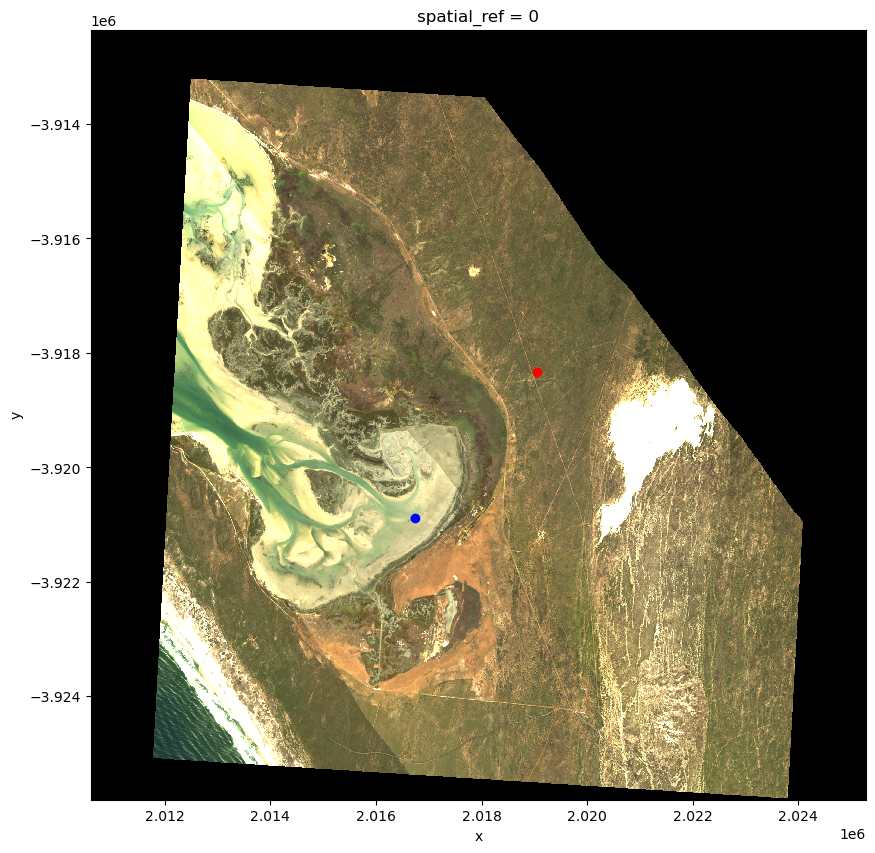

In [45]:
# Open the GeoTIFF file
raster = rx.open_rasterio(gtiff_paths[7])

# Plot the RGB image
plt.figure(figsize=(10, 10))
raster.plot.imshow(rgb="band")
plt.scatter(terr_x,terr_y, color='red')
plt.scatter(aqua_x,aqua_y, color='blue')
plt.show()


And now we'll merge the 8 mosaic **geoTIFF** files and visualize the data available over our region of interest

In [46]:
data_arrays = []
for g in gtiff_paths:
    data_arrays.append(rx.open_rasterio(g))

merged_array = rx.merge.merge_arrays(data_arrays, method='last')
merged_array.rio.to_raster('merged_image.tif')

#plt.figure(figsize=(10, 10))
#merged_array.plot.imshow(rgb='band')
#plt.show()


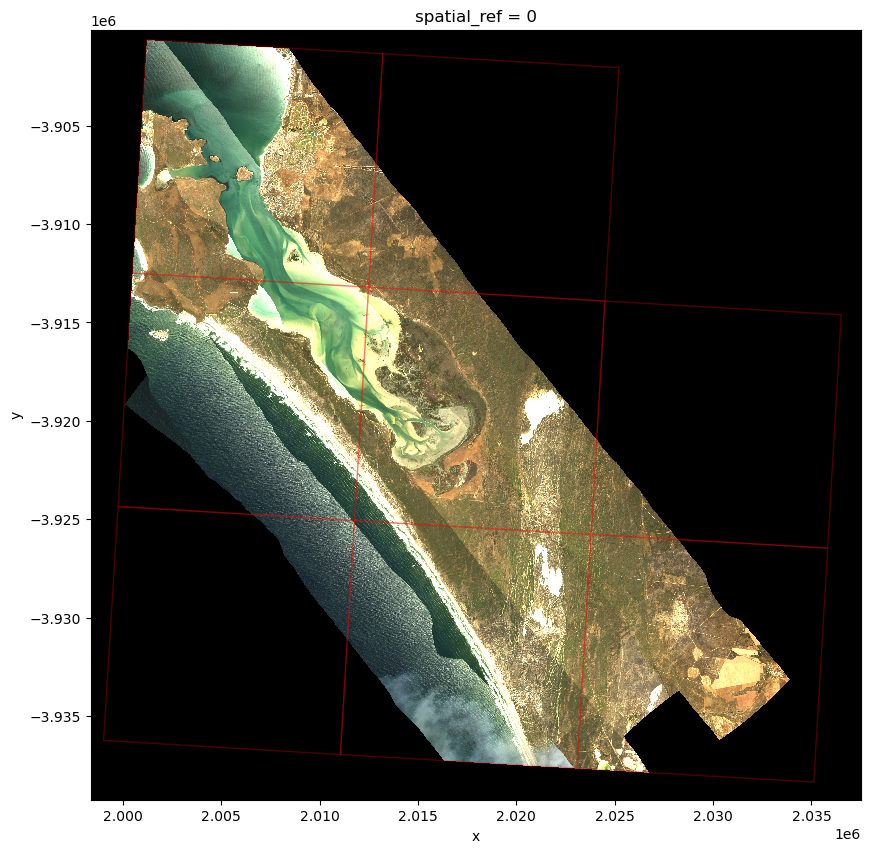

In [47]:
ANG_L3_EPSG = 'EPSG:3857' 
subset_gdf_9221 = subset_gdf.to_crs(ANG_L3_EPSG)  
fig, ax = plt.subplots(figsize=(10, 10))
merged_array.plot.imshow(rgb='band', ax=ax)

subset_gdf_9221.plot(ax=ax, facecolor='none', edgecolor='red', alpha=0.3)
plt.show()

### List S3 Links for Mosaic AVIRIS-NG 425-band **Reflectance netCDF** Files
- Again, we'll use the `results` from earthaccess API search to display the [`data_links`](https://earthaccess.readthedocs.io/en/latest/user-reference/granules/granules/#earthaccess.results.DataGranule.data_links) of the netCDF files

In [48]:
def get_s3_links(g, suffix_str):
    return [i for i in g.data_links(access="direct") if i.endswith(suffix_str)][0]

rfl_f = []
for g in results:
    rfl_f.append(get_s3_links(g, 'RFL.nc'))
rfl_f

['s3://ornl-cumulus-prod-protected/bioscape/BioSCape_ANG_V02_L3_RFL_Mosaic/data/AVIRIS-NG_BIOSCAPE_V02_L3_26_9_RFL.nc',
 's3://ornl-cumulus-prod-protected/bioscape/BioSCape_ANG_V02_L3_RFL_Mosaic/data/AVIRIS-NG_BIOSCAPE_V02_L3_27_7_RFL.nc',
 's3://ornl-cumulus-prod-protected/bioscape/BioSCape_ANG_V02_L3_RFL_Mosaic/data/AVIRIS-NG_BIOSCAPE_V02_L3_27_9_RFL.nc',
 's3://ornl-cumulus-prod-protected/bioscape/BioSCape_ANG_V02_L3_RFL_Mosaic/data/AVIRIS-NG_BIOSCAPE_V02_L3_26_7_RFL.nc',
 's3://ornl-cumulus-prod-protected/bioscape/BioSCape_ANG_V02_L3_RFL_Mosaic/data/AVIRIS-NG_BIOSCAPE_V02_L3_27_8_RFL.nc',
 's3://ornl-cumulus-prod-protected/bioscape/BioSCape_ANG_V02_L3_RFL_Mosaic/data/AVIRIS-NG_BIOSCAPE_V02_L3_25_7_RFL.nc',
 's3://ornl-cumulus-prod-protected/bioscape/BioSCape_ANG_V02_L3_RFL_Mosaic/data/AVIRIS-NG_BIOSCAPE_V02_L3_25_8_RFL.nc',
 's3://ornl-cumulus-prod-protected/bioscape/BioSCape_ANG_V02_L3_RFL_Mosaic/data/AVIRIS-NG_BIOSCAPE_V02_L3_26_8_RFL.nc']

**Recall that these are Multifile Granules with 3 files per Granule.  We've selected just the netCDF files in** **`granule_arr`**

### Directly Open, Access, and Visualize AVIRIS-NG Mosaic Data from the AWS S3 Session 
Using **`xarray`** and the **`earthaccess.open`** function we can directly read from a remote filesystem, but not download a file.  

In [49]:
paths = earthaccess.open(rfl_f, provider="ORNL_CLOUD")

QUEUEING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/8 [00:00<?, ?it/s]

In [50]:
paths

[<File-like object S3FileSystem, ornl-cumulus-prod-protected/bioscape/BioSCape_ANG_V02_L3_RFL_Mosaic/data/AVIRIS-NG_BIOSCAPE_V02_L3_26_9_RFL.nc>,
 <File-like object S3FileSystem, ornl-cumulus-prod-protected/bioscape/BioSCape_ANG_V02_L3_RFL_Mosaic/data/AVIRIS-NG_BIOSCAPE_V02_L3_27_7_RFL.nc>,
 <File-like object S3FileSystem, ornl-cumulus-prod-protected/bioscape/BioSCape_ANG_V02_L3_RFL_Mosaic/data/AVIRIS-NG_BIOSCAPE_V02_L3_27_9_RFL.nc>,
 <File-like object S3FileSystem, ornl-cumulus-prod-protected/bioscape/BioSCape_ANG_V02_L3_RFL_Mosaic/data/AVIRIS-NG_BIOSCAPE_V02_L3_26_7_RFL.nc>,
 <File-like object S3FileSystem, ornl-cumulus-prod-protected/bioscape/BioSCape_ANG_V02_L3_RFL_Mosaic/data/AVIRIS-NG_BIOSCAPE_V02_L3_27_8_RFL.nc>,
 <File-like object S3FileSystem, ornl-cumulus-prod-protected/bioscape/BioSCape_ANG_V02_L3_RFL_Mosaic/data/AVIRIS-NG_BIOSCAPE_V02_L3_25_7_RFL.nc>,
 <File-like object S3FileSystem, ornl-cumulus-prod-protected/bioscape/BioSCape_ANG_V02_L3_RFL_Mosaic/data/AVIRIS-NG_BIOSCAPE

In [51]:
ds_set = xr.open_dataset(paths[7], engine="h5netcdf")
ds_set

<xarray.Dataset> Size: 32kB
Dimensions:              (easting: 2000, northing: 2000)
Coordinates:
  * easting              (easting) float64 16kB 7.6e+05 7.6e+05 ... 7.7e+05
  * northing             (northing) float64 16kB 9.3e+05 9.3e+05 ... 9.2e+05
Data variables:
    transverse_mercator  |S1 1B ...
Attributes: (12/22)
    Conventions:                       CF-1.6
    date_created:                      2025-04-23T20:35:46Z
    summary:                           Mosaic of AVIRIS-NG L2A Reflectance da...
    keywords:                          Imaging Spectroscopy, AVIRIS, AVIRIS-NG
    sensor:                            Airborne Visible / Infrared Imaging Sp...
    instrument:                        AVIRIS-NG
    ...                                ...
    ncei_template_version:             NCEI_NetCDF_Grid_Template_v2.0
    title:                             AVIRIS-NG L3 Mosaiced Surface Reflecta...
    processing_level:                  L3
    time_coverage_start:               2023-10-22T00:00:00Z
    time_coverage_end:                 2024-11-26T23:59:59Z
    product_version:                   002

Notice that this `xarray.Dataset` is limited in what is showing and has no variables.  

**The netCDF data model for these data includes multi-group hierarchies within a single file where each `group` maps to an xarray.Dataset**
- In xarray, it is recommended to use DataTree to represent hierarchical data
>netCDF groups can only be loaded individually as Dataset objects, a whole file of many nested groups can be loaded as a single xarray.DataTree object. To open a whole netCDF file as a tree of groups use the xarray.open_datatree() function. 
- This implementation in XArray is decribed here: https://docs.xarray.dev/en/stable/user-guide/io.html

In [52]:
ds = xr.open_datatree(paths[7], engine="h5netcdf")
ds

<xarray.DataTree>
Group: /
│   Dimensions:              (easting: 2000, northing: 2000)
│   Coordinates:
│     * easting              (easting) float64 16kB 7.6e+05 7.6e+05 ... 7.7e+05
│     * northing             (northing) float64 16kB 9.3e+05 9.3e+05 ... 9.2e+05
│   Data variables:
│       transverse_mercator  |S1 1B ...
│   Attributes: (12/22)
│       Conventions:                       CF-1.6
│       date_created:                      2025-04-23T20:35:46Z
│       summary:                           Mosaic of AVIRIS-NG L2A Reflectance da...
│       keywords:                          Imaging Spectroscopy, AVIRIS, AVIRIS-NG
│       sensor:                            Airborne Visible / Infrared Imaging Sp...
│       instrument:                        AVIRIS-NG
│       ...                                ...
│       ncei_template_version:             NCEI_NetCDF_Grid_Template_v2.0
│       title:                             AVIRIS-NG L3 Mosaiced Surface Reflecta...
│       processing_level:                  L3
│       time_coverage_start:               2023-10-22T00:00:00Z
│       time_coverage_end:                 2024-11-26T23:59:59Z
│       product_version:                   002
├── Group: /reflectance
│       Dimensions:      (wavelength: 425, northing: 2000, easting: 2000)
│       Coordinates:
│         * wavelength   (wavelength) float32 2kB 377.2 382.2 ... 2.496e+03 2.501e+03
│       Data variables:
│           fwhm         (wavelength) float32 2kB ...
│           reflectance  (wavelength, northing, easting) float32 7GB ...
├── Group: /obs
│       Dimensions:             (northing: 2000, easting: 2000)
│       Data variables:
│           path_length         (northing, easting) float32 16MB ...
│           to_sensor_azimuth   (northing, easting) float32 16MB ...
│           to_sensor_zenith    (northing, easting) float32 16MB ...
│           to_sun_azimuth      (northing, easting) float32 16MB ...
│           to_sun_zenith       (northing, easting) float32 16MB ...
│           solar_phase         (northing, easting) float32 16MB ...
│           slope               (northing, easting) float32 16MB ...
│           aspect              (northing, easting) float32 16MB ...
│           cosine_i            (northing, easting) float32 16MB ...
│           utc_time            (northing, easting) float32 16MB ...
│           earth_sun_distance  (northing, easting) float32 16MB ...
└── Group: /scene_info
        Dimensions:      (northing: 2000, easting: 2000, scene_ids: 3647)
        Dimensions without coordinates: scene_ids
        Data variables:
            scene_id     (northing, easting) uint16 8MB ...
            scene_names  (scene_ids) <U22 321kB ...

Now we see that the netCDF files contains Groups (3)
- reflectance
- obs
- scene info

We'll open the file again as a datatree, and then convert it to a dataset with the `reflectance` variable

In [53]:
# plot a single file netcdf
rfl_df = xr.open_datatree(paths[7],
                              engine='h5netcdf', chunks={})
rfl_df = rfl_df.reflectance.to_dataset()
rfl_df = rfl_df.reflectance.where(rfl_df.reflectance>0)
rfl_df

<xarray.DataArray 'reflectance' (wavelength: 425, northing: 2000, easting: 2000)> Size: 7GB
dask.array<where, shape=(425, 2000, 2000), dtype=float32, chunksize=(10, 256, 256), chunktype=numpy.ndarray>
Coordinates:
  * easting     (easting) float64 16kB 7.6e+05 7.6e+05 ... 7.7e+05 7.7e+05
  * northing    (northing) float64 16kB 9.3e+05 9.3e+05 ... 9.2e+05 9.2e+05
  * wavelength  (wavelength) float32 2kB 377.2 382.2 ... 2.496e+03 2.501e+03
Attributes:
    _QuantizeBitGroomNumberOfSignificantDigits:  5
    long_name:                                   Mosaiced Hemispherical Direc...
    grid_mapping:                                transverse_mercator
    orthorectified:                              True

Next, we'll subset the wavelenghts that correspond to RGB bands and visualize the true color image with holoview

In [54]:
ds_rgb = rfl_ds.reflectance.sel(wavelength=[637, 552, 462], method="nearest")

In [55]:
ds_rgb.hvplot.rgb('easting', 'northing', rasterize=True,robust=True, data_aspect=1, aspect='equal', 
                  bands='wavelength', frame_width=600)

:DynamicMap   []
   :RGB   [easting,northing]   (R,G,B)

In [56]:
#### false color composite - undcomment these lines to run
#ds_fcc = rfl_ds.reflectance.sel(wavelength=[800, 637, 552], method="nearest")
#ds_fcc.hvplot.rgb('easting', 'northing', rasterize=True,robust=True, data_aspect=1, aspect='equal', 
#                  bands='wavelength', frame_width=600)

In [57]:
#### The Minimum Noise Fraction transformation (MNF) composite images (B456, B546, and B561), can be used to enhance the delineation of different rock types
## uncomment these lines to run
#ds_mnf = rfl_ds.reflectance.sel(wavelength=[456, 546, 561], method="nearest")
#ds_mnf.hvplot.rgb('easting', 'northing', rasterize=True,robust=True, data_aspect=1, aspect='equal', 
#                  bands='wavelength', frame_width=600)

### Plot Spectral Profiles of the Terrestrial and Aquatic Plots 

First, we need to convert the plot's latitude and longitude to the AVIRIS-NG netCDF files projection

In [37]:
#latitude = -33.1733
#longitude = 18.1374
# translate coordinates
#from pyproj import Proj
p = Proj("EPSG:9221", preserve_units=False)
terr_x,terr_y = p(terr_lon, terr_lat)
print('terr_easting:',terr_x)
print('terr_northing', terr_y)
aqua_x,aqua_y = p(aqua_lon, aqua_lat)
print('aqua_easting:', aqua_x)
print('aqua_northing', aqua_y)

terr_easting: 765692.1777874201
terr_northing 926021.7440919735
aqua_easting: 763899.5907153768
aqua_northing 923763.8287129314


Define a list of bands that are atmospheric windows to avoid in plotting

In [38]:
# Define a list of wavelengths that are "bad" 
bblist = np.ones((425,))  # create a 1D array with values ones
# set tails and atmospheric window to zero
bblist[0:14] = 0        # tail
bblist[193:210] = 0     # atmospheric window
bblist[281:320] = 0     # atmospheric window
bblist[405:] = 0        # tail

Select and plot the spectral profiles from the terrestrial and aquatic plot locations nearest pixel

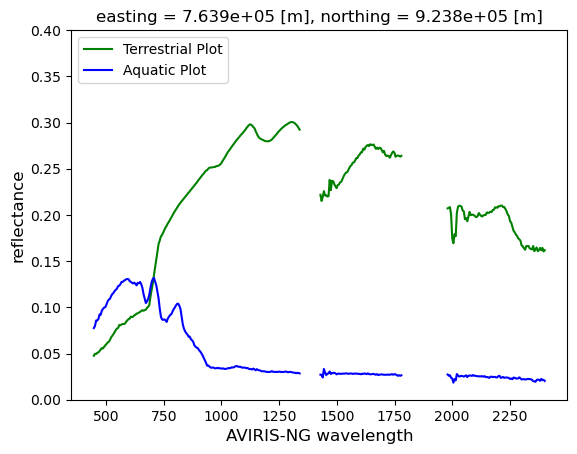

In [39]:
# Compare spectra from a terrestrial and aquatic plot
terr_plot = rfl_ds.reflectance.sel(easting=terr_x, northing=terr_y, method='nearest')
terr_plot[bblist == 0] = np.nan
aqua_plot = rfl_ds.reflectance.sel(easting=aqua_x, northing=aqua_y, method='nearest')
aqua_plot[bblist == 0] = np.nan

terr_plot.plot.line(ylim=(0,.4), color = 'g', label="Terrestrial Plot")
aqua_plot.plot.line(ylim=(0,.4),color = 'b', label="Aquatic Plot")

plt.rcParams['figure.figsize'] = [10,7]
plt.xlabel('AVIRIS-NG wavelength', fontsize=12)
plt.ylabel('reflectance', fontsize=12)
plt.legend(loc="upper left")
plt.show()


These next block of code will merge the selected files.  We will not run this during the workshop.  uncomment to run.  

In [ ]:
#s3_obj = []
#for fh in paths:
#    s3_obj.append(xr.open_datatree(fh, engine='h5netcdf', 
#                                  ).reflectance.to_dataset())
#ds = xr.combine_by_coords(s3_obj, combine_attrs='override')